# Visualize the learning curves

In this notebook, I show-case the learning curves. - class error, box loss and total loss
* I trained the model on Tesla T4 for 3 hours and for 45 epochs. 

In [1]:
import torch
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url = 'https://raw.githubusercontent.com/rarefin/detr/multi-mnist/outputs/log.txt'
urllib.request.urlretrieve(url, "./log.txt")

('./log.txt', <http.client.HTTPMessage at 0x13843a6d8>)

In [3]:
def plot_logs(logs, fields=('class_error', 'loss_bbox_unscaled'), ewm_col=0):
    dfs = [pd.read_json(Path(p) / 'log.txt', lines=True) for p in logs]

    fig, axs = plt.subplots(ncols=len(fields), figsize=(16, 5))

    for df, color in zip(dfs, sns.color_palette(n_colors=len(logs))):
        for j, field in enumerate(fields):
            if field == 'mAP':
                coco_eval = pd.DataFrame(pd.np.stack(df.test_coco_eval.dropna().values)[:, 1]).ewm(com=ewm_col).mean()
                axs[j].plot(coco_eval, c=color)
            else:
                df.interpolate().ewm(com=ewm_col).mean().plot(
                    y=[f'train_{field}', f'test_{field}'],
                    ax=axs[j],
                    color=[color] * 2,
                    style=['-', '--']
                )
    for ax, field in zip(axs, fields):
        ax.legend([p for p in ['train', 'test']])
        ax.set_title(field)

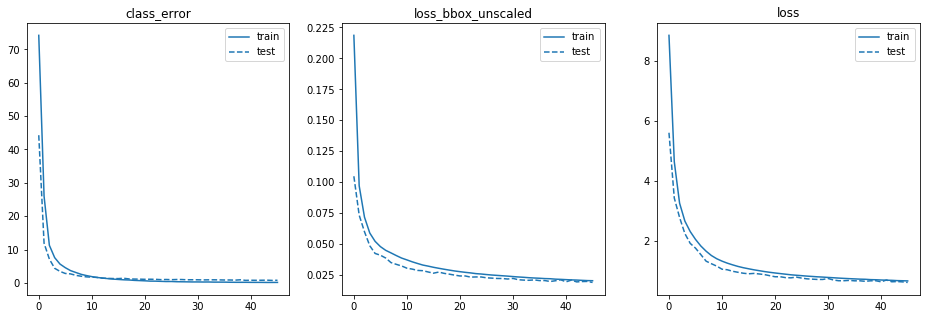

In [4]:
plot_logs(logs=['.'], fields=('class_error', 'loss_bbox_unscaled', 'loss'))